# Longest valid parentheses

Get a row of random parentheses. Find a longest substring of valid parentheses

In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# Helper generator
def randpar(n):
    a = ['(',')']
    b = np.random.randint(0,2,n)
    return ''.join([a[i] for i in b])

s = randpar(21)
print(s)

)((()(()))(()(()((())


'(()(()))'

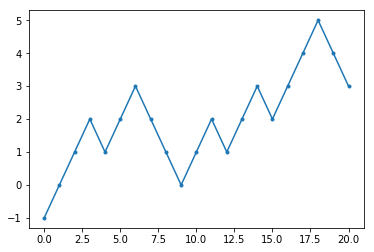

In [77]:
def longpar(s):
    a = {'(':1 , ')':-1}
    v = [a[i] for i in list(s)]
    for i in range(len(v)): # cumsum. Can be included in loop below of course
        if i>0:
            v[i] += v[i-1]
    #print(v)
    plt.plot(v,'.-')
    
    left  = {}
    right = {}
    topl = topr = 0
    prev = 0
    for i in range(len(v)):
        if (prev<v[i]) or (v[i] not in left): # Going up or down for the first time
            left[v[i]]  = i
            right[v[i]] = i
            #print('Started',v[i],'at',i)
        else: # Going down and not the first time: close stuff
            #print('Closing',v[i],'at',i)
            if i-left[v[i]] > topr-topl:
                topl = left[v[i]]
                topr = i
                right[v[i]] = i
        prev = v[i]
    #print(topl,topr)
    return ''.join(s[(topl+1):(topr+1)]) # Mistake before debugging: forgot +1
    
longpar(s)